In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler


plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import The Maximum Power Dataset

In [13]:
df=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Max_solar_data.csv')



df.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000041,2.369843,90.429688,147.949219,0.616820,-0.530396,-0.160283,-146.003418,120.255127,25.595601,1.000000,50.000000,1.000000,50.000000,F0M
1,0.010040,2.378357,90.368652,148.242188,-0.678956,0.570679,0.047847,148.546906,-119.881439,-24.723663,1.000000,50.000000,1.000000,50.000000,F0M
2,0.020039,2.373627,90.460205,148.535156,0.603393,-0.537109,-0.187139,-145.027008,120.315399,26.109924,1.000000,50.000000,1.000000,50.000000,F0M
3,0.030038,2.368896,90.423584,148.242188,-0.685670,0.570679,0.041133,147.341461,-119.736786,-26.105906,0.440380,50.078491,118.275197,49.921509,F0M
4,0.040037,2.362274,90.435791,148.242188,0.630248,-0.523682,-0.166997,-143.279114,120.942230,26.680501,0.618996,50.248673,90.022162,49.606494,F0M


# Divide the dataset into Train-test split  and do the standard scalling

In [14]:
def split_transform(df,split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

In [15]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.001)

The number of samples in the Training set is 10690
The number of samples in the Test set is 11


# Do Model training

In [16]:
def Model_with_cross_val(df,clf,k_fold,test_size):
    # Split transform the data
    X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.01)
    print("")
    #Generate k-fold with shuffled split
    cv = ShuffleSplit(n_splits=k_fold, test_size=test_size)
    
    # get score for each split
    scores = cross_val_score(clf, X_sc_train,y_train, cv=cv, n_jobs=-1)
    
    #print scores with mean and std
    print(scores)
    
    print("{} accuracy with a standard deviation of {}".format(np.mean(scores),np.std(scores)))
    print("")




# Random Forest

In [18]:
clf = RandomForestClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10593
The number of samples in the Test set is 108

[0.99307741 0.99307741 0.9940214  0.99496539 0.99370673]
0.9937696664568911 accuracy with a standard deviation of 0.000700788466057882



# Decision Trees

In [19]:
clf = DecisionTreeClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10593
The number of samples in the Test set is 108

[0.97608559 0.98426683 0.9811202  0.97577093 0.9776589 ]
0.9789804908747641 accuracy with a standard deviation of 0.003254294140679157



# SVM

In [8]:
clf = SVC()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10593
The number of samples in the Test set is 108

[0.92983008 0.93108874 0.92353682 0.89332914 0.93706734]
0.9229704216488358 accuracy with a standard deviation of 0.015431211930637526



# KNN

In [20]:
clf = KNeighborsClassifier(n_neighbors=5)
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10593
The number of samples in the Test set is 108

[0.94650724 0.94273128 0.94147262 0.94052863 0.94493392]
0.9432347388294524 accuracy with a standard deviation of 0.002203542026433195



# Logistic Reg

In [22]:
clf = LogisticRegression()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10593
The number of samples in the Test set is 108

[0.84959094 0.86406545 0.85431089 0.85494021 0.86123348]
0.8568281938325992 accuracy with a standard deviation of 0.0051781000454938



# Naive Byes

In [23]:
clf = GaussianNB()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10593
The number of samples in the Test set is 108

[0.75424795 0.76148521 0.77155444 0.76651982 0.75582127]
0.7619257394587791 accuracy with a standard deviation of 0.006484202327195098



# Do prediction with best performing Model

The number of samples in the Training set is 8560
The number of samples in the Test set is 2141


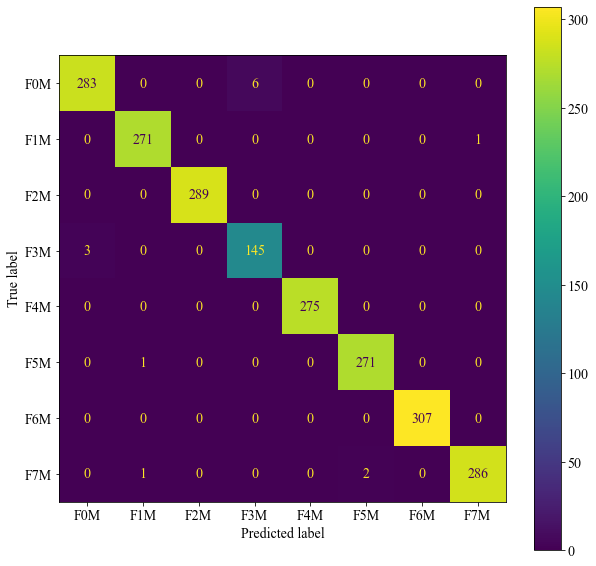

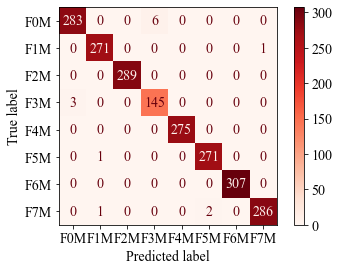

In [24]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.2)

Model = RandomForestClassifier()
Model.fit(X_sc_train,y_train)

fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_estimator(
    Model,
    X_sc_test,
    y_test,
    display_labels=Model.classes_,
    cmap=plt.cm.Reds
)


disp.plot(ax=ax)
